In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "FacePix",
    shuffle= True, 
    image_size = (60,51),
    batch_size = 32
)

Found 5430 files belonging to 2 classes.


In [3]:
EPOCHS = 150

In [4]:
class_names = dataset.class_names
class_names

['Head_Movement_Allowed', 'Head_Movement_Not_Allowed']

In [5]:
len(dataset)

170

In [6]:
for img, label in dataset.take(1):
 print(img.shape)
 print(label.numpy())

(32, 60, 51, 3)
[1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1]


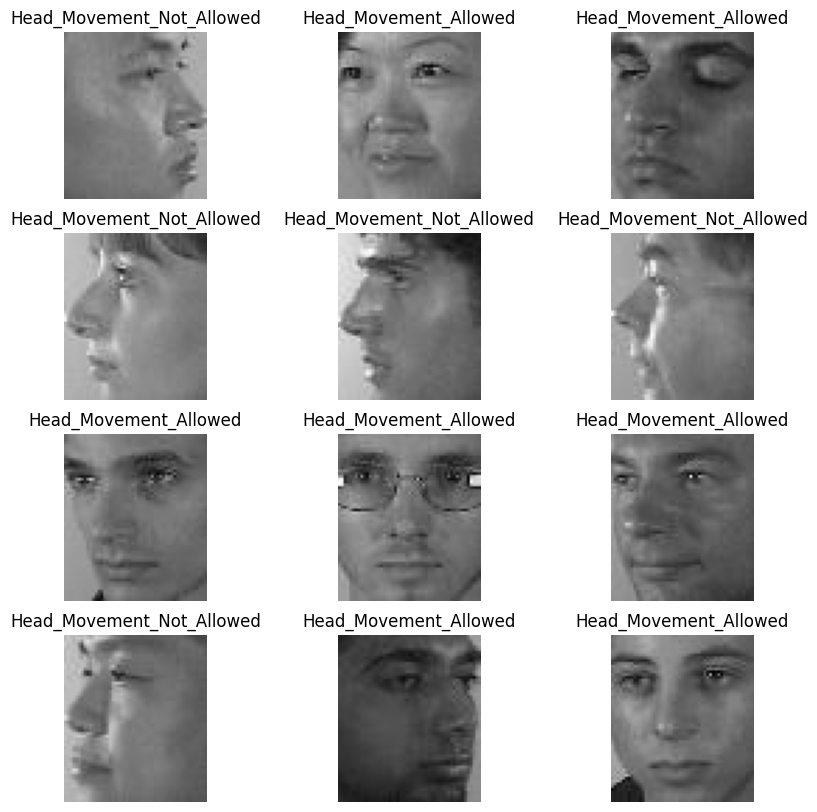

In [7]:
plt.figure(figsize=(10,10))

for img, label in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4,3, i+1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")
 

In [8]:
train_size = 0.8
len(dataset) * train_size

136.0

In [9]:
train_dataset = dataset.take(136)
len(train_dataset)

136

In [10]:
test_dataset = dataset.skip(136)
len(test_dataset)

34

In [11]:
val_size = 0.1  #validation data
len(dataset) * val_size

17.0

In [12]:
val_dataset = test_dataset.take(17)
len(val_dataset)

17

In [13]:
test_dataset = test_dataset.skip(17)
len(test_dataset)

17

In [14]:
def get_dataset_partitions_tf(dataset, train_split= 0.8, val_split= 0.1, test_split= 0.1, shuffle= True, shuffle_size=10000):
    dataset_size = len(dataset)
    
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed= 12)
    
    train_size = int(train_split* dataset_size)
    val_size   = int(val_split* dataset_size)
    
    train_dataset = dataset.take(train_size)
    val_dataset   = dataset.skip(train_size).take(val_size)
    test_dataset   = dataset.skip(train_size).skip(val_size)
    
    return train_dataset,  val_dataset, test_dataset

In [15]:
train_dataset,  val_dataset, test_dataset = get_dataset_partitions_tf(dataset)

In [16]:
len(train_dataset)


136

In [17]:
len(val_dataset)


17

In [18]:
len(test_dataset)

17

In [19]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [20]:
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [21]:
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [22]:
#Data Preprocessing

In [23]:


resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(60,51),
    tf.keras.layers.Rescaling(1.0/255)
    
    
    
    
])



In [24]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    
    
    
    
])



In [25]:
def preprocess_image(image):
    image = tf.image.rgb_to_grayscale(image)  # Convert RGB to grayscale
    return image

In [26]:
train_dataset = train_dataset.map(lambda x, y: (preprocess_image(x), y))
val_dataset = val_dataset.map(lambda x, y: (preprocess_image(x), y))
test_dataset = test_dataset.map(lambda x, y: (preprocess_image(x), y))

In [27]:



# Model Implementation

In [28]:
BATCH_SIZE = 32


n_classes =2 

model = models.Sequential([
    layers.InputLayer(input_shape=(60, 51, 1)),
    layers.Reshape((60, 51)),  # Flatten spatial dimensions for LSTM
    layers.LSTM(128, return_sequences=True),
    layers.LSTM(128),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])




In [29]:
model.build(input_shape = (None,60,51,1) )

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 60, 51)            0         
                                                                 
 lstm (LSTM)                 (None, 60, 128)           92160     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 232130 (906.76 KB)
Trainable params: 232

In [31]:
model.compile(

        optimizer = 'adam',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
        metrics = ['accuracy']


)

In [32]:
history = model.fit(
    
    train_dataset,
    epochs = EPOCHS,
    batch_size = 32,
    verbose = 1,
    validation_data = val_dataset


)         

Epoch 1/150
136/136 [==============================] - 18s 104ms/step - loss: 0.3607 - accuracy: 0.8496 - val_loss: 0.3077 - val_accuracy: 0.8952
Epoch 2/150
136/136 [==============================] - 9s 65ms/step - loss: 0.2537 - accuracy: 0.9109 - val_loss: 0.2668 - val_accuracy: 0.9044
Epoch 3/150
136/136 [==============================] - 9s 64ms/step - loss: 0.2563 - accuracy: 0.9099 - val_loss: 0.2414 - val_accuracy: 0.9026
Epoch 4/150
136/136 [==============================] - 9s 63ms/step - loss: 0.2171 - accuracy: 0.9277 - val_loss: 0.2256 - val_accuracy: 0.9191
Epoch 5/150
136/136 [==============================] - 9s 67ms/step - loss: 0.2176 - accuracy: 0.9309 - val_loss: 0.2909 - val_accuracy: 0.9191
Epoch 6/150
136/136 [==============================] - 8s 62ms/step - loss: 0.1821 - accuracy: 0.9404 - val_loss: 0.1841 - val_accuracy: 0.9375
Epoch 7/150
136/136 [==============================] - 9s 64ms/step - loss: 0.2150 - accuracy: 0.9247 - val_loss: 0.2097 - val_accurac

136/136 [==============================] - 11s 80ms/step - loss: 0.0695 - accuracy: 0.9714 - val_loss: 0.0890 - val_accuracy: 0.9596
Epoch 114/150
136/136 [==============================] - 11s 82ms/step - loss: 0.0847 - accuracy: 0.9678 - val_loss: 0.0924 - val_accuracy: 0.9706
Epoch 115/150
136/136 [==============================] - 16s 121ms/step - loss: 0.0778 - accuracy: 0.9687 - val_loss: 0.0754 - val_accuracy: 0.9669
Epoch 116/150
136/136 [==============================] - 11s 79ms/step - loss: 0.0963 - accuracy: 0.9648 - val_loss: 0.0920 - val_accuracy: 0.9724
Epoch 117/150
136/136 [==============================] - 13s 95ms/step - loss: 0.1138 - accuracy: 0.9588 - val_loss: 0.1034 - val_accuracy: 0.9632
Epoch 118/150
136/136 [==============================] - 13s 94ms/step - loss: 0.0777 - accuracy: 0.9696 - val_loss: 0.0700 - val_accuracy: 0.9761
Epoch 119/150
136/136 [==============================] - 12s 90ms/step - loss: 0.0688 - accuracy: 0.9710 - val_loss: 0.0944 - val_a

In [33]:
scores = model.evaluate(test_dataset)

17/17 [==============================] - 2s 25ms/step - loss: 0.0565 - accuracy: 0.9743


In [34]:
scores

[0.05646991357207298, 0.9742646813392639]

In [35]:
scoress = model.evaluate(train_dataset)

136/136 [==============================] - 3s 25ms/step - loss: 0.0718 - accuracy: 0.9717


In [36]:
scoress

[0.07176917046308517, 0.9716720581054688]

In [37]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

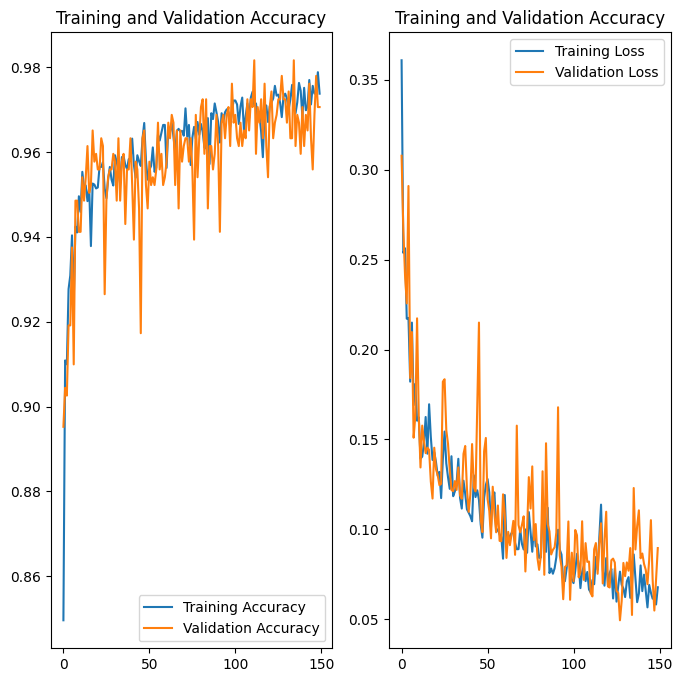

In [39]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')




plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Accuracy')

IMAGE PREDICTION
Actual Label:  Head_Movement_Not_Allowed
1/1 [==============================] - 2s 2s/step
Predicted Label:  Head_Movement_Not_Allowed


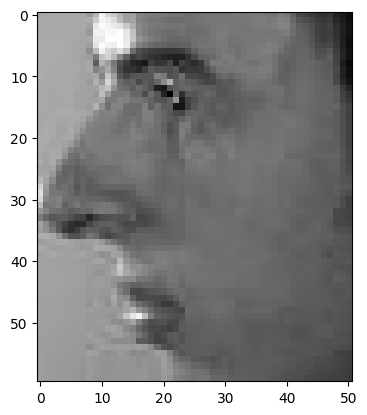

In [40]:
import numpy as np

for img, label in test_dataset.take(1):
    first_image = img[0].numpy().astype("uint8")
    first_label = label[0].numpy()
    
    print("IMAGE PREDICTION")
    plt.imshow(first_image, cmap='gray')
    
    print("Actual Label: ", class_names[first_label])
    
    
    batch_prediction = model.predict(img)
    predict1 = np.argmax(batch_prediction[0])
    print("Predicted Label: ", class_names[predict1])
    

In [41]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 23ms/step


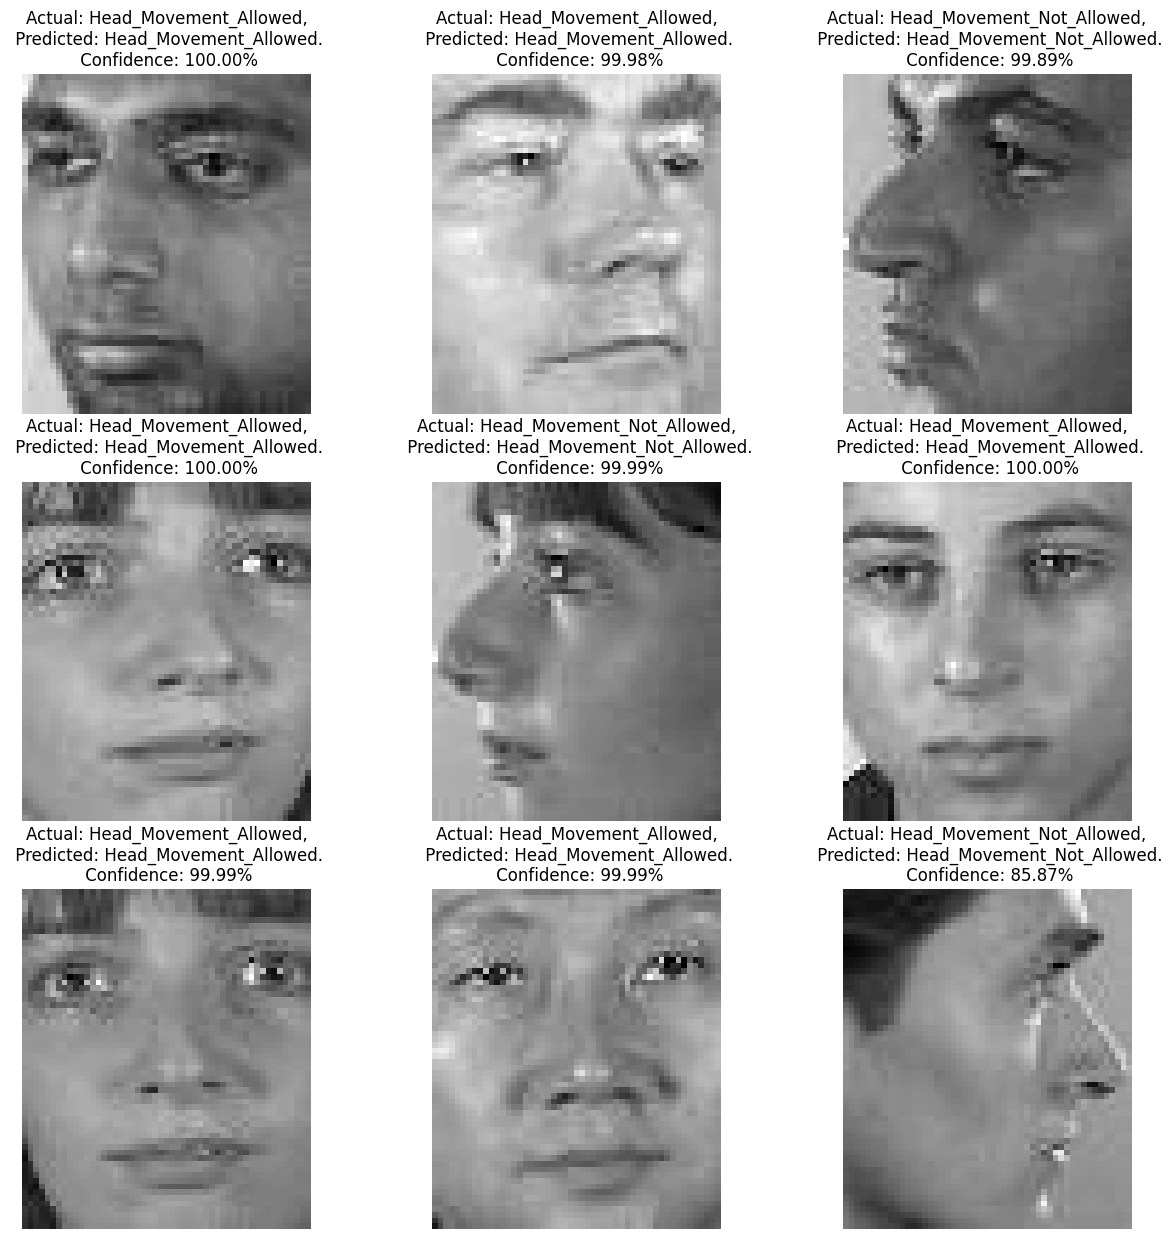

In [42]:
def predict(model, img):
    # Reshape the image as model expects a batch of images
    img_batch = tf.expand_dims(img, 0)  
    predictions = model.predict(img_batch)
    predicted_class = class_names[tf.argmax(predictions[0])]
    confidence = tf.reduce_max(predictions[0]).numpy() * 100
    return predicted_class, confidence

plt.figure(figsize=(15, 15))
for img, label in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"), cmap='gray')
        
        predicted_class, confidence = predict(model, img[i])
        actual_class = class_names[label[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence:.2f}%")
        plt.axis("off")
        

In [43]:
import os

model_version = 'LSTM_Model_1'
model_dir = "../models"

# Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save the model
model.save(f"{model_dir}/{model_version}.keras")


1/1 [==============================] - 0s 35ms/step


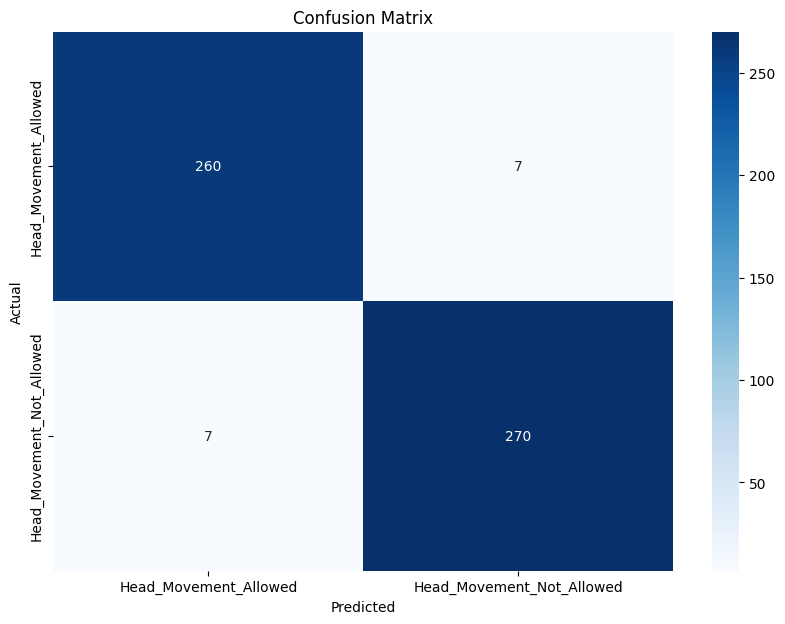

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_true = []
y_pred = []

for img, label in test_dataset:
    preds = model.predict(img)
    y_true.extend(label.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [1]:
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(60, 51), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = img_array* (1.0 / 255.0)
    return img_array

def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    predictions = model.predict(img_array)
    print(predictions)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


img_path = 'F:\Pic\Ray.jpg'


predicted_class, confidence = predict_image(model, img_path)


print(f"Predicted Class: {predicted_class}, Confidence: {confidence}%")

NameError: name 'model' is not defined

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [47]:
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.9747292418772563
Recall: 0.9747292418772563
F1 Score: 0.9747292418772563
